<a href="https://colab.research.google.com/github/AbdulRahman788/RECOGNITION_OF_OBJECTS/blob/main/RECOGNITION_OF_OBJECTS_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib  import pyplot as plt
import numpy as np

In [ ]:
import keras

In [ ]:
(X_train,y_train), (X_test, y_test)=keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [ ]:
print("Training images: {}". format(X_train.shape))
print("Testing images: {}". format(X_test.shape))

Training images: (50000, 32, 32, 3)
Testing images: (10000, 32, 32, 3)


In [ ]:
print(X_train[0].shape)

(32, 32, 3)


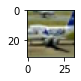

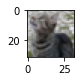

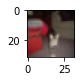

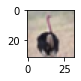

In [ ]:
for i in range(332,336):
  plt.subplot(120+ 1 +i)
  img = X_train[i]
  plt.imshow(img)
  plt.show()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train /= 225
X_test = X_test/225
n_classes = 10

print("shape before one-hot encoding ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("shape after one-hot encoding ", Y_train.shape)

shape before one-hot encoding  (50000, 1)
shape after one-hot encoding  (50000, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape= (32,32,3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(500, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(250, activation="relu"))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation="softmax"))
#compiling
model.compile(loss= "categorical_crossentropy", metrics=["accuracy"], optimizer ="adam") 
# training the model
model.fit(X_train, Y_train, batch_size=128,epochs=10, validation_data=(X_test,Y_test))

Epoch 1/10
391/391 [==============================] - 367s 937ms/step - loss: 1.6012 - accuracy: 0.4128 - val_loss: 1.1601 - val_accuracy: 0.5911
Epoch 2/10
391/391 [==============================] - 367s 938ms/step - loss: 1.1091 - accuracy: 0.6095 - val_loss: 0.9564 - val_accuracy: 0.6696
Epoch 3/10
391/391 [==============================] - 368s 942ms/step - loss: 0.9258 - accuracy: 0.6741 - val_loss: 0.8256 - val_accuracy: 0.7099
Epoch 4/10
391/391 [==============================] - 368s 942ms/step - loss: 0.8082 - accuracy: 0.7157 - val_loss: 0.7291 - val_accuracy: 0.7455
Epoch 5/10
391/391 [==============================] - 368s 942ms/step - loss: 0.7251 - accuracy: 0.7467 - val_loss: 0.7109 - val_accuracy: 0.7527
Epoch 6/10
391/391 [==============================] - 368s 941ms/step - loss: 0.6569 - accuracy: 0.7680 - val_loss: 0.6900 - val_accuracy: 0.7633
Epoch 7/10
391/391 [==============================] - 368s 941ms/step - loss: 0.6003 - accuracy: 0.7890 - val_loss: 0.6563 -

In [ ]:
 classes = range(0,10)
names = [ 'airplane',
         'automobile',
         'bird',
        'cat',
         'deer',
         'dog',
         'frog',
         'horse',
         'ship',
         'truck']

class_labels = dict(zip(classes, names))
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109], axis=-1)
predictions = model.predict(batch, verbose=1)

1/1 [==============================] - 0s 112ms/step


In [ ]:
print(predictions)

[[6.22900086e-04 3.61438433e-05 8.74595642e-02 6.05272613e-02
  1.17574453e-01 4.81707752e-01 1.35545246e-03 2.50172377e-01
  3.41487641e-04 2.02701136e-04]
 [2.83028494e-05 8.03237344e-06 3.83024849e-03 1.13387711e-01
  3.73271597e-03 8.64111960e-01 4.02596034e-03 1.07053705e-02
  6.25719695e-05 1.07157779e-04]
 [2.73491719e-06 2.78354582e-05 4.68401331e-03 3.14702722e-03
  6.26948604e-05 2.20429408e-03 9.89661336e-01 9.29261078e-05
  8.32963906e-06 1.08680484e-04]
 [7.16568024e-07 1.55961160e-07 3.54406337e-04 9.93582904e-01
  1.38266617e-03 3.73101351e-03 9.03203210e-04 3.65886626e-05
  8.47467959e-07 7.55616611e-06]
 [1.31311779e-07 9.88922238e-01 9.30416421e-12 1.06931727e-10
  3.66232211e-14 6.15017204e-11 6.69502509e-11 1.31131677e-11
  1.61645218e-07 1.10775055e-02]
 [2.50556059e-05 9.84365702e-01 7.30826955e-08 3.19220021e-07
  7.27820082e-10 7.28980893e-08 2.94505014e-07 7.25079730e-09
  2.23881565e-04 1.53844915e-02]
 [8.12543370e-03 1.47227873e-03 2.63311595e-01 3.24515581e

In [ ]:
for image in predictions:
  print(np.sum(image))

1.0000001
1.0000001
0.9999999
1.0
1.0
0.9999999
1.0
1.0
1.0


In [ ]:
class_result= np.argmax(predictions,axis=-1)
print(class_result)

[5 5 6 3 1 1 3 6 8]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


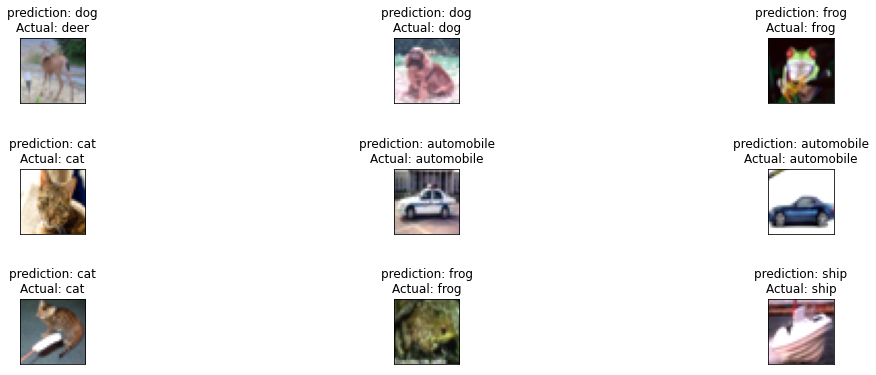

In [ ]:
fig,axs=plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()

for i, img in enumerate(batch):
  for key, value in class_labels.items():
    if class_result[i] == key:
      title = "prediction: {}\nActual: {}".format(class_labels[key], class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)

  axs[i].imshow(img)
plt.show()